In [1]:
import pandas as pd
import numpy as np

np.random.seed(10)
rows = 150

In [3]:
data = {
    "Student_ID": range(1, rows + 1),
    "Age": np.random.randint(16, 30, rows),
    "Gender": np.random.choice(["Male", "Female", "Other"], rows),
    "Study_Hours": np.random.normal(6, 2, rows),
    "Attendance": np.random.randint(40, 110, rows),
    "Internal_Marks": np.random.randint(10, 50, rows),
    "Final_Marks": np.random.randint(25, 100, rows),
    "Backlogs": np.random.randint(0, 5, rows),
    "CGPA": np.round(np.random.normal(7.2, 1.5, rows), 2)
}

In [5]:
df = pd.DataFrame(data)

In [7]:
df.loc[np.random.choice(df.index, 12), "Study_Hours"] = np.nan
df.loc[np.random.choice(df.index, 10), "CGPA"] = np.nan
df.loc[np.random.choice(df.index, 8), "Age"] = np.nan
df.loc[np.random.choice(df.index, 6), "Gender"] = np.nan

In [9]:
df.loc[5, "Attendance"] = 150
df.loc[8, "Attendance"] = -20

df.loc[12, "Final_Marks"] = 200
df.loc[20, "Final_Marks"] = 250
df.loc[25, "Final_Marks"] = -10

df.loc[30, "CGPA"] = 12
df.loc[35, "CGPA"] = -3

df.loc[40, "Study_Hours"] = 20
df.loc[45, "Study_Hours"] = 0

df.loc[50, "Backlogs"] = -2
df.loc[55, "Backlogs"] = 10

In [27]:
df.to_csv("academic_performance.csv", index=False)

In [13]:
print("Dataset created with missing values, inconsistencies & outliers!")

Dataset created with missing values, inconsistencies & outliers!


In [29]:
df = pd.read_csv("academic_performance.csv")
df.head()

,Student_ID,Age,Gender,Study_Hours,Attendance,Internal_Marks,Final_Marks,Backlogs,CGPA
0,1,25.0,Other,4.194497,94,28,87,0,10.51
1,2,29.0,Other,2.577449,48,14,29,0,6.52
2,3,20.0,NaN,7.665052,50,21,34,2,6.89
3,4,16.0,Male,7.658504,97,42,55,0,6.76
4,5,17.0,Other,2.961550,44,22,75,4,8.56


In [17]:
df.isnull().sum()

Student_ID         0
Age                8
Gender             5
Study_Hours       10
Attendance         0
Internal_Marks     0
Final_Marks        0
Backlogs           0
CGPA               9
dtype: int64

In [23]:
df.describe()


,Student_ID,Age,Study_Hours,Attendance,Internal_Marks,Final_Marks,Backlogs,CGPA
count,150.000000,142.000000,140.000000,150.000000,150.000000,150.000000,150.000000,141.000000
mean,75.500000,22.471831,5.843993,74.346667,29.693333,61.753333,1.946667,6.955177
std,43.445368,4.347811,2.419555,22.336050,12.651205,28.571102,1.579171,1.768022
min,1.000000,16.000000,0.000000,-20.000000,10.000000,-10.000000,-2.000000,-3.000000
25%,38.250000,18.000000,4.153575,57.250000,19.000000,43.250000,1.000000,5.740000
50%,75.500000,23.000000,5.868341,75.000000,29.000000,60.000000,2.000000,6.890000
75%,112.750000,26.000000,7.438421,94.000000,41.750000,77.000000,3.000000,8.110000
max,150.000000,29.000000,20.000000,150.000000,49.000000,250.000000,10.000000,12.000000


In [25]:
df[df["Attendance"] > 100]
df[df["CGPA"] > 10]
df[df["Final_Marks"] < 0]

,Student_ID,Age,Gender,Study_Hours,Attendance,Internal_Marks,Final_Marks,Backlogs,CGPA
25,26,24.0,Female,2.747605,91,48,-10,4,7.23


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [41]:
df = pd.read_csv("academic_performance.csv")
df.head()

,Student_ID,Age,Gender,Study_Hours,Attendance,Internal_Marks,Final_Marks,Backlogs,CGPA
0,1,25.0,Other,4.194497,94,28,87,0,10.51
1,2,29.0,Other,2.577449,48,14,29,0,6.52
2,3,20.0,NaN,7.665052,50,21,34,2,6.89
3,4,16.0,Male,7.658504,97,42,55,0,6.76
4,5,17.0,Other,2.961550,44,22,75,4,8.56


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student_ID      150 non-null    int64  
 1   Age             142 non-null    float64
 2   Gender          145 non-null    object 
 3   Study_Hours     140 non-null    float64
 4   Attendance      150 non-null    int64  
 5   Internal_Marks  150 non-null    int64  
 6   Final_Marks     150 non-null    int64  
 7   Backlogs        150 non-null    int64  
 8   CGPA            141 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 10.7+ KB


In [45]:
df.isnull().sum()

Student_ID         0
Age                8
Gender             5
Study_Hours       10
Attendance         0
Internal_Marks     0
Final_Marks        0
Backlogs           0
CGPA               9
dtype: int64

In [100]:
df["Study_Hours"] = df["Study_Hours"].fillna(df["Study_Hours"].median())
df["CGPA"] = df["CGPA"].fillna(df["CGPA"].mean())
df["Age"] = df["Age"].fillna(df["Age"].median())

In [102]:
if not df["Gender"].mode().empty:
    df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
else:
    df["Gender"] = df["Gender"].fillna("Unknown")


In [104]:
df.isnull().sum()

Student_ID        0
Age               0
Gender            0
Study_Hours       0
Attendance        0
Internal_Marks    0
Final_Marks       0
Backlogs          0
CGPA              0
dtype: int64

In [106]:
df.describe()

,Student_ID,Age,Study_Hours,Attendance,Internal_Marks,Final_Marks,Backlogs,CGPA
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,22.500000,5.845617,74.346667,29.693333,61.753333,1.946667,6.955177
std,43.445368,4.231156,2.336960,22.336050,12.651205,28.571102,1.579171,1.713793
min,1.000000,16.000000,0.000000,-20.000000,10.000000,-10.000000,-2.000000,-3.000000
25%,38.250000,18.250000,4.215299,57.250000,19.000000,43.250000,1.000000,5.867500
50%,75.500000,23.000000,5.868341,75.000000,29.000000,60.000000,2.000000,6.955177
75%,112.750000,26.000000,7.239838,94.000000,41.750000,77.000000,3.000000,8.022500
max,150.000000,29.000000,20.000000,150.000000,49.000000,250.000000,10.000000,12.000000


In [108]:
df.loc[df["Attendance"] > 100, "Attendance"] = 100
df.loc[df["Attendance"] < 0, "Attendance"] = 0

df.loc[df["CGPA"] > 10, "CGPA"] = 10
df.loc[df["CGPA"] < 0, "CGPA"] = 0

df.loc[df["Final_Marks"] > 100, "Final_Marks"] = 100
df.loc[df["Final_Marks"] < 0, "Final_Marks"] = 0

df.loc[df["Backlogs"] < 0, "Backlogs"] = 0

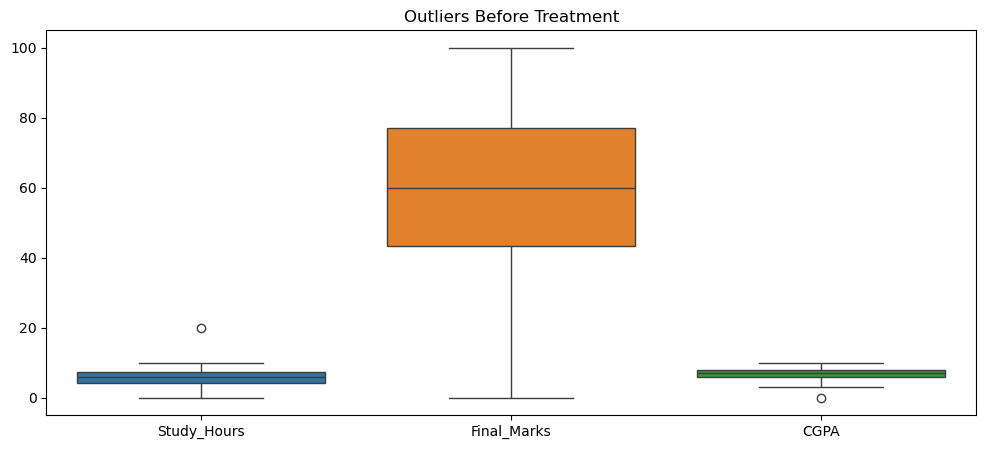

In [110]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df[["Study_Hours", "Final_Marks", "CGPA"]])
plt.title("Outliers Before Treatment")
plt.show()

In [112]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df_z = df[(z_scores < 3).all(axis=1)]


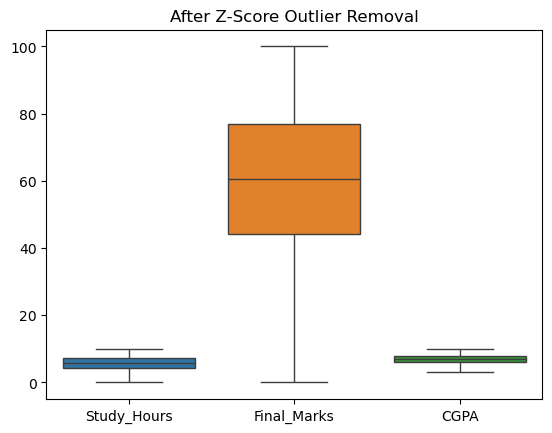

In [114]:
sns.boxplot(data=df_z[["Study_Hours", "Final_Marks", "CGPA"]])
plt.title("After Z-Score Outlier Removal")
plt.show()

In [116]:
Q1 = df["Final_Marks"].quantile(0.25)
Q3 = df["Final_Marks"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_iqr = df[(df["Final_Marks"] >= lower) & (df["Final_Marks"] <= upper)]


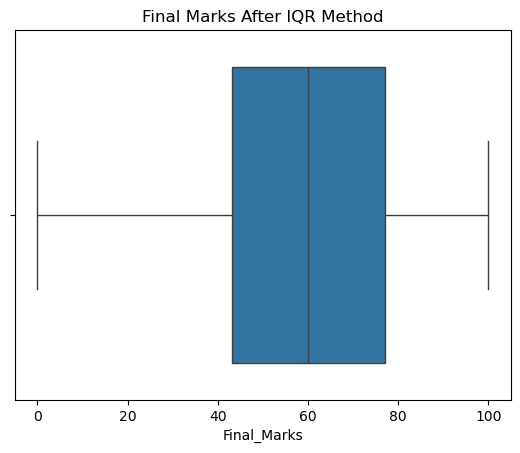

In [118]:
sns.boxplot(x=df_iqr["Final_Marks"])
plt.title("Final Marks After IQR Method")
plt.show()


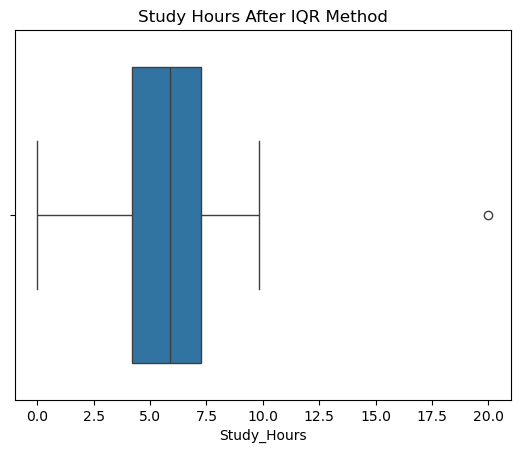

In [122]:
sns.boxplot(x=df_iqr["Study_Hours"])
plt.title("Study Hours After IQR Method")
plt.show()


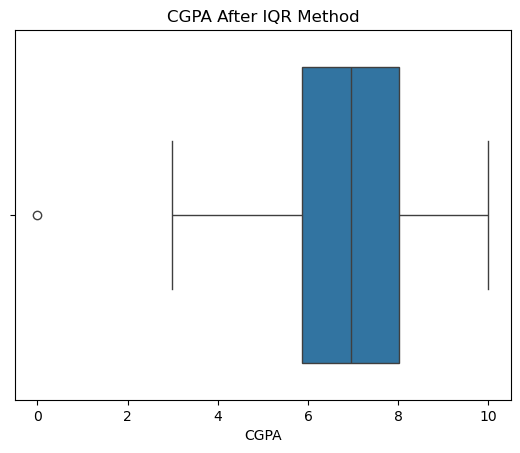

In [124]:
sns.boxplot(x=df_iqr["CGPA"])
plt.title("CGPA After IQR Method")
plt.show()


In [126]:
df["Study_Hours"].skew()

1.3168478698792767

In [128]:
df["Study_Hours_Log"] = np.log1p(df["Study_Hours"])


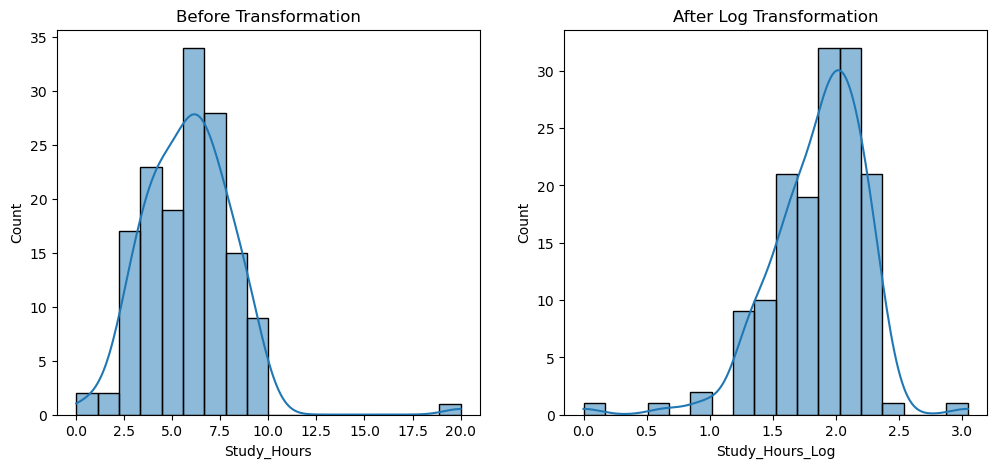

In [130]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Study_Hours"], kde=True)
plt.title("Before Transformation")

plt.subplot(1,2,2)
sns.histplot(df["Study_Hours_Log"], kde=True)
plt.title("After Log Transformation")

plt.show()


In [132]:
df.head()

,Student_ID,Age,Gender,Study_Hours,Attendance,Internal_Marks,Final_Marks,Backlogs,CGPA,Study_Hours_Log
0,1,25.0,Other,4.194497,94,28,87,0,10.00,1.647600
1,2,29.0,Other,2.577449,48,14,29,0,6.52,1.274650
2,3,20.0,Female,7.665052,50,21,34,2,6.89,2.159298
3,4,16.0,Male,7.658504,97,42,55,0,6.76,2.158542
4,5,17.0,Other,2.961550,44,22,75,4,8.56,1.376635


In [134]:
df.to_csv("academic_performance_cleaned.csv", index=False)
